**[Introduction to Machine Learning Home Page](https://www.kaggle.com/learn/intro-to-machine-learning)**

---


In [6]:
# Code you have previously used to load data
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [7]:
train = pd.read_csv(r'C:\Users\lohani\Desktop\train.csv', index_col='Id')

In [8]:
test =pd.read_csv(r'C:\Users\lohani\Desktop\test.csv', index_col='Id')

**FEATURES SELECTION**

In [9]:
# Remove rows with missing target, separate target from predictors
train.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = train.SalePrice
train.drop(['SalePrice'], axis=1, inplace=True)

# porcharea
train['porcharea'] = train['OpenPorchSF'] + train['EnclosedPorch'] + train['3SsnPorch'] + train['ScreenPorch']
test['porcharea'] = test['OpenPorchSF'] + test['EnclosedPorch'] + test['3SsnPorch'] + test['ScreenPorch']
# total rooms
#train['rooms'] = train['BedroomAbvGr'] + train['KitchenAbvGr']
#test['rooms'] = test['BedroomAbvGr'] + test['KitchenAbvGr']

un=['KitchenAbvGr', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']

train.drop(['KitchenAbvGr', 'BedroomAbvGr', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis=1, inplace=True)


train.drop(['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis=1, inplace=True)

test.drop(['KitchenAbvGr', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis=1, inplace=True)

test.drop(['KitchenAbvGr', 'BedroomAbvGr', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis=1, inplace=True)

#Select numerical columns
numerical_cols = [cname for cname in train.columns if train[cname].dtype in ['int64', 'float64']]

num = train[numerical_cols]

num

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(train, 0.80)
len(set(corr_features))

corr_features

In [10]:

from sklearn.model_selection import train_test_split

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(train, y, train_size=0.8, test_size=0.2, random_state=0)

X_train.shape, test.shape

((1168, 79), (1459, 79))

In [6]:
objList = X_train.select_dtypes(include = "object").columns
print (objList)
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    X_train[feat] = le.fit_transform(X_train[feat].astype(str))

#print (X_train.info())

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


<ipython-input-6-0418f2782355>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[feat] = le.fit_transform(X_train[feat].astype(str))


# Variance Threshold
# Feature selector that removes all low-variance features.

# This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning

In [7]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0.05)
var_thres.fit(X_train)
var_thres.get_support()
X_train.columns[var_thres.get_support()]
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))


5


In [8]:
for feature in constant_columns:
     print(feature)

Street
Utilities
Condition2
KitchenAbvGr
PoolQC


display(train['Street'].unique(), train['Utilities'].unique())
print(train.groupby(train['Street']).count(), 
    train.groupby(train['Utilities']).count(),
    train.groupby(train['Condition2']).count(),
    train.groupby(train['KitchenAbvGr']).count(),
    train.groupby(train['MiscFeature']).count())

# ******####****after checking variance of different features we decided to remove those who have variance less than .05********
****

In [23]:
# % missing values

def missing(df):

    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

display(missing(X_train))
display(missing(test))


,Total,Percent
LotFrontage,212,18.15
GarageYrBlt,58,4.97
MasVnrArea,6,0.51


,Total,Percent


# #dropping all those column who has more than 80% null values and who has valiance less than .1

In [10]:
X_train = X_train.drop(constant_columns,axis=1)

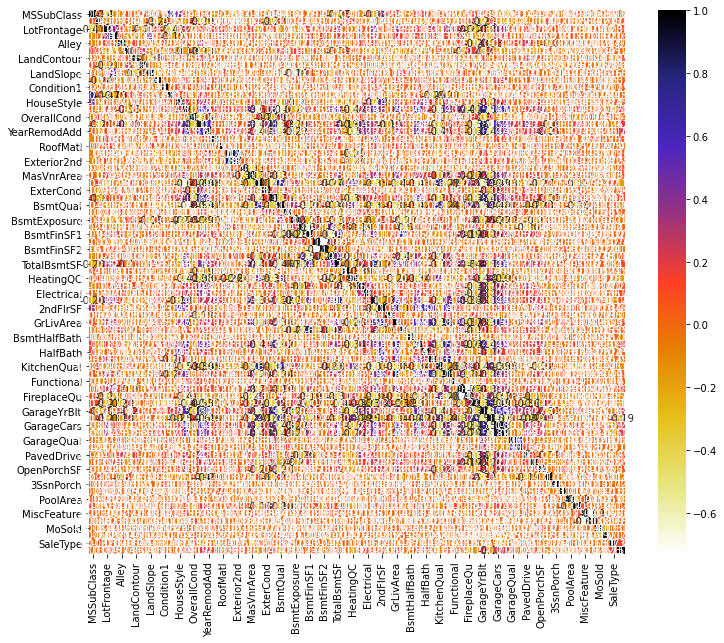

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [12]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [13]:
corr_features = correlation(train, 0.90)
len(set(corr_features))

0

In [14]:
X_train = X_train.drop(corr_features,axis=1)

X_train['LotFrontage'] = X_train['LotFrontage'].fillna(X_train['LotFrontage'].mode()[0])
X_train['MasVnrArea'] = X_train['MasVnrArea'].fillna(X_train['MasVnrArea'].mode()[0])

X_train['GarageYrBlt'] = X_train['GarageYrBlt'].fillna(X_train['GarageYrBlt'].mode()[0])

## Model Building, Prediction and Evaluation

In [15]:
objList = X_valid.select_dtypes(include = "object").columns
print (objList)
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    X_valid[feat] = le.fit_transform(X_valid[feat].astype(str))

#print (X_valid.info())

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


<ipython-input-15-479d53721ce3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid[feat] = le.fit_transform(X_valid[feat].astype(str))


In [16]:
X_valid = X_valid.drop(constant_columns,axis=1)
X_valid = X_valid.drop(corr_features,axis=1)
# replacing null

X_valid['LotFrontage'] = X_valid['LotFrontage'].fillna(X_valid['LotFrontage'].mode()[0])
X_valid['MasVnrArea'] = X_valid['MasVnrArea'].fillna(X_valid['MasVnrArea'].mode()[0])

#X_valid['GarageYrBlt'] = X_valid['GarageYrBlt'].fillna(X_valid['GarageYrBlt'].mode()[0])

In [17]:
from sklearn.metrics import mean_absolute_error

#Setting up model with XGBRegressor
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state = 5, n_estimators = 1500, learning_rate=0.03)

In [18]:
#Setting up model with XGBRegressor 
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state = 5, n_estimators = 1500, learning_rate=0.03)

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)


In [19]:
#Fitting model and predicting val scores

xgb.fit(X_train, y_train)

predictions_1 = xgb.predict(X_valid)

mean_absolute_error(predictions_1, y_valid)

17071.225532427226

# TEST

In [20]:
objList = test.select_dtypes(include = "object").columns
print (objList)
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    test[feat] = le.fit_transform(test[feat].astype(str))

#print (test.info())

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [21]:
test = test.drop(constant_columns,axis=1)
test = test.drop(corr_features,axis=1)
# replacing null


LotFrontage	227	15.56
GarageYrBlt	78	5.35
MasVnrArea	15	1.03
BsmtFullBath	2	0.14
BsmtHalfBath	2	0.14
BsmtUnfSF	1	0.07
GarageCars	1	0.07
GarageArea	1	0.07
TotalBsmtSF	1	0.07
BsmtFinSF1	1	0.07
BsmtFinSF2	1	0.07

In [22]:
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].mode()[0])
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].mode()[0])
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].mode()[0])
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(test['BsmtFullBath'].mode()[0])
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mode()[0])
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mode()[0])
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].mode()[0])
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].mode()[0])
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mode()[0])
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mode()[0])
test['BsmtFinSF2'] = test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mode()[0])


In [24]:
#Preprocessing of test data and fitting model
test_predictions = xgb.predict(test)

In [26]:
# Save test predictions to file
output = pd.DataFrame({'Id': test.index,
                       'SalePrice': test_predictions})

In [27]:
# Exporting results

output.to_csv(r'C:\Users\lohani\Desktop\xgb11.csv', index=False)